In [1]:
import numpy as np
from matplotlib import pyplot as plt
from math import ceil

In [2]:
msg = np.random.randint(low=0, high=2, size=int(10))
# BFSK parameters
Eb = 0.001
fs = 10000
Tb = 0.001
f2 = 1/Tb
f1 = ceil(f2 + 1/Tb) # Non-coherent detection

In [3]:
# Generation of orthogonal waveforms

t = np.linspace(0, Tb, int(Tb*fs), endpoint=False)

phi1 = np.sqrt(2/Tb)*np.cos(2*np.pi*f1*t)
phi2 = np.sqrt(2/Tb)*np.cos(2*np.pi*f2*t)

print(phi1.sum()*Tb)
print(phi2.sum()*Tb)
orthocheck=phi1.dot(phi2)
print(orthocheck)

-2.1316282072803006e-17
-1.4210854715202004e-17
-4.547473508864641e-13


In [110]:
# FSK Modulation
m = []
for i in msg:
    if i == 1:
        mm = [1] * int(Tb*fs)
        m.extend(mm)
    else:
        mm = [-1] * int(Tb*fs)
        m.extend(mm)
m = np.array(m)


df = (f1-f2)/2
fc = f1 - df

s = np.zeros(int(Tb*fs)*len(msg))
t = np.linspace(0, len(msg)*Tb, int(Tb*fs)*len(msg), endpoint=False)

sm = 0
i = 0


for mm, tt in zip(m, t):
    sm += mm
    s[i] = np.cos(2*np.pi*fc*tt + 2*np.pi*df*sm*Tb)
    i += 1


s *= np.sqrt(Eb)

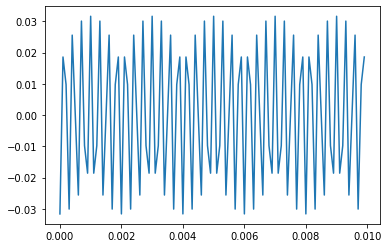

In [111]:
plt.plot(t, s)